In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression

In [7]:
file='/Users/roxoho/Downloads/Data-pv/csv-data/AC_POWER_123_1653228336_QWnoYs549VJqEi4mYk4jBL.csv'

In [72]:
df = pd.read_csv(file)

In [31]:
df.head(20)

,Time,AC POWER-3 (W),AC POWER-2 (W),AC POWER-1 (W)
0,31/12/2020 13:15:00,1801.0,1818.0,1805.0
1,31/12/2020 13:30:00,3546.0,3613.0,3533.0
2,31/12/2020 13:45:00,4065.0,4134.0,4071.0
3,31/12/2020 14:00:00,2813.0,2792.0,2762.0
4,31/12/2020 14:15:00,2961.0,2987.0,2945.0
5,31/12/2020 14:30:00,1060.0,1060.0,1049.0
6,31/12/2020 14:45:00,2259.0,2253.0,2219.0
7,31/12/2020 15:00:00,2419.0,2430.0,2388.0
8,31/12/2020 15:15:00,2685.0,2699.0,2650.0
9,31/12/2020 15:30:00,1252.0,1252.0,1244.0


Text(0.5, 1.0, 'Power vs. Time')

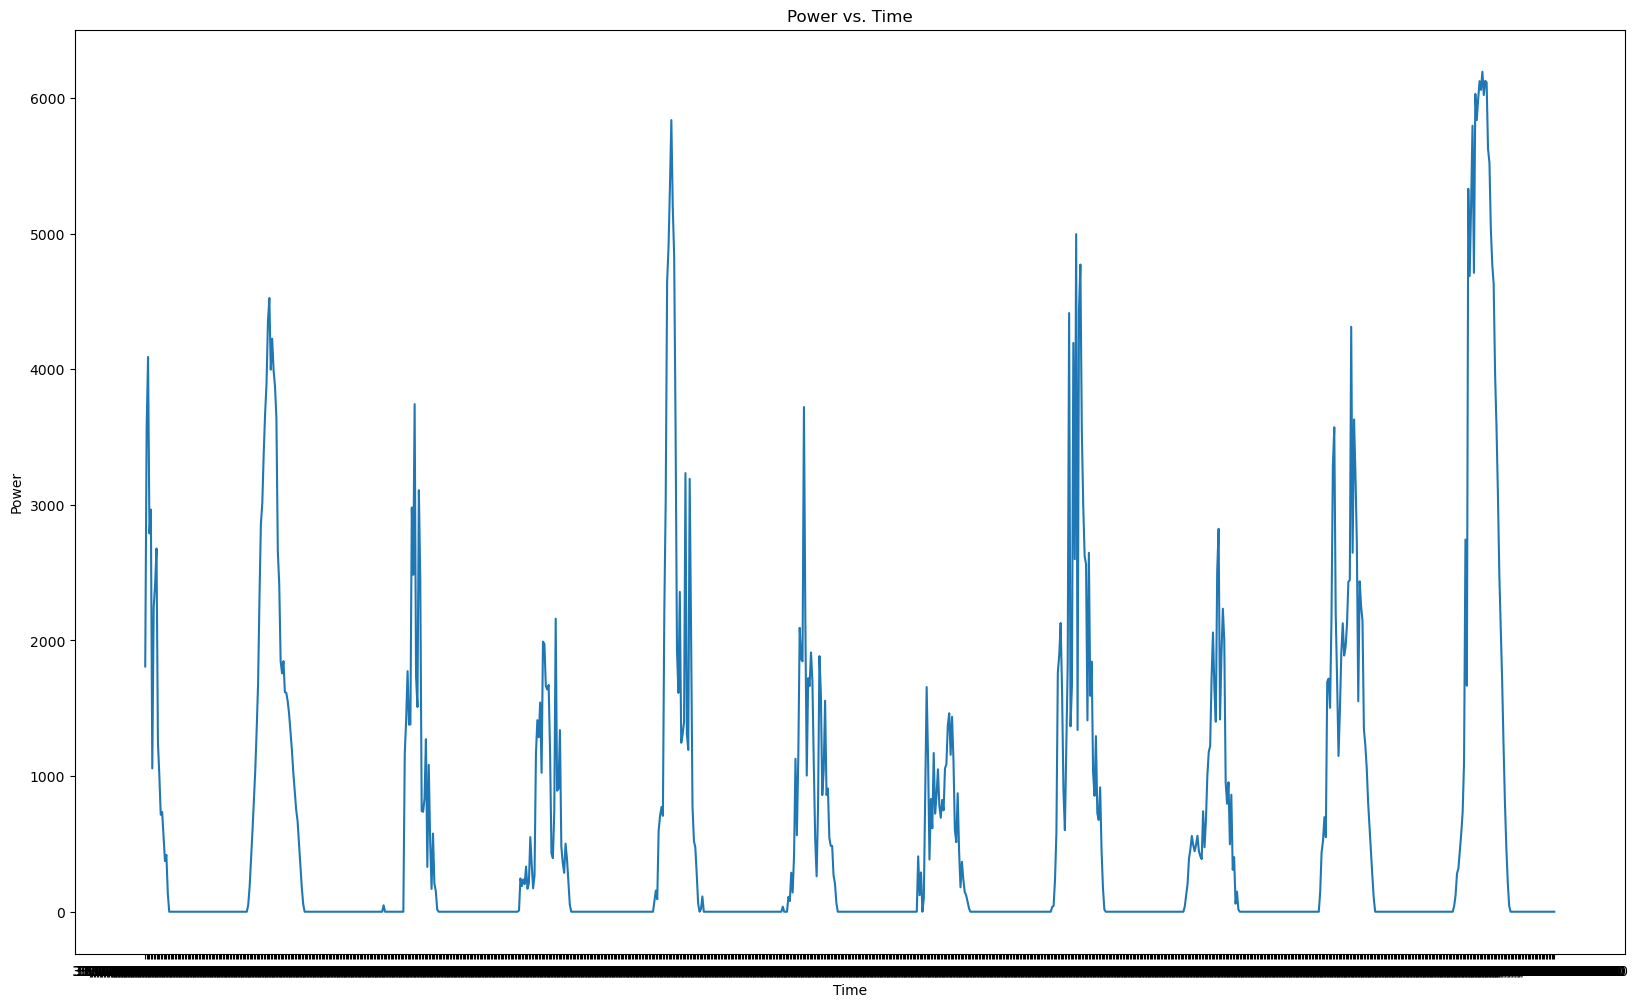

In [55]:
#plot 1
temp= df.head(1000)
plt.figure(figsize=(20, 12))
plt.plot(temp['Time'], (temp['AC POWER-1 (W)']+temp['AC POWER-2 (W)']+temp['AC POWER-3 (W)'])/3, label='Power 1')
#plt.plot(temp['Time'], temp['AC POWER-2 (W)'], label='Power 2')
#plt.plot(temp['Time'], temp['AC POWER-3 (W)'], label='Power 3')
plt.xlabel('Time')
plt.ylabel('Power')
plt.title('Power vs. Time')

In [80]:
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)
min_time = df['Time'].min()
max_time = df['Time'].max()

print(f"Minimum time: {min_time}")
print(f"Maximum time: {max_time}")

Minimum time: 2020-12-31 13:15:00
Maximum time: 2022-05-22 08:45:00


In [104]:
irradiance = pd.read_csv('/Users/roxoho/Downloads/Data-pv/csv-data/irr.csv', header=9)

In [106]:
irradiance.head(50)

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN
0,2020,12,31,0,0.00
1,2020,12,31,1,0.00
2,2020,12,31,2,0.00
3,2020,12,31,3,0.00
4,2020,12,31,4,0.00
5,2020,12,31,5,0.00
6,2020,12,31,6,0.00
7,2020,12,31,7,50.54
8,2020,12,31,8,148.52
9,2020,12,31,9,263.15


In [108]:
irradiance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12192 entries, 0 to 12191
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               12192 non-null  int64  
 1   MO                 12192 non-null  int64  
 2   DY                 12192 non-null  int64  
 3   HR                 12192 non-null  int64  
 4   ALLSKY_SFC_SW_DWN  12192 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 476.4 KB


In [112]:
df['YEAR'] = df['Time'].dt.year
df['MO'] = df['Time'].dt.month
df['DY'] = df['Time'].dt.day
df['HR'] = df['Time'].dt.hour

In [124]:
df.head(50)

,Time,YEAR,MO,DY,HR,Power
0,2020-12-31 13:15:00,2020,12,31,13,1808.000000
1,2020-12-31 13:30:00,2020,12,31,13,3564.000000
2,2020-12-31 13:45:00,2020,12,31,13,4090.000000
3,2020-12-31 14:00:00,2020,12,31,14,2789.000000
4,2020-12-31 14:15:00,2020,12,31,14,2964.333333
5,2020-12-31 14:30:00,2020,12,31,14,1056.333333
6,2020-12-31 14:45:00,2020,12,31,14,2243.666667
7,2020-12-31 15:00:00,2020,12,31,15,2412.333333
8,2020-12-31 15:15:00,2020,12,31,15,2678.000000
9,2020-12-31 15:30:00,2020,12,31,15,1249.333333


In [118]:
df['Power'] = df[['AC POWER-3 (W)', 'AC POWER-2 (W)', 'AC POWER-1 (W)']].mean(axis=1)

In [122]:
df.drop(['AC POWER-3 (W)', 'AC POWER-2 (W)', 'AC POWER-1 (W)'], axis=1, inplace=True)

In [153]:
# Group by day and hour, then calculate the average power
averaged_df = df.groupby([df['YEAR'],df['MO'],df['DY'], df['HR']]).agg({'Power': 'mean'}).reset_index()


In [161]:
averaged_df.head(50)

,YEAR,MO,DY,HR,Avg Power
0,2020,12,31,13,3154.000000
1,2020,12,31,14,2263.333333
2,2020,12,31,15,1836.250000
3,2020,12,31,16,594.666667
4,2020,12,31,17,0.000000
5,2020,12,31,18,0.000000
6,2020,12,31,19,0.000000
7,2020,12,31,20,0.000000
8,2020,12,31,21,0.000000
9,2020,12,31,22,0.000000


In [157]:
averaged_df = averaged_df.rename(columns={'Power': 'Avg Power'})

In [159]:
averaged_df.loc[averaged_df['HR'].between(0, 6) | averaged_df['HR'].between(17, 23), 'Avg Power'] = 0


In [171]:
averaged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10232 entries, 0 to 10231
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       10232 non-null  int32  
 1   MO         10232 non-null  int32  
 2   DY         10232 non-null  int32  
 3   HR         10232 non-null  int32  
 4   Avg Power  10232 non-null  float64
dtypes: float64(1), int32(4)
memory usage: 239.9 KB


In [205]:
merged_data = pd.merge(averaged_df, irradiance, on=['YEAR', 'MO', 'DY', 'HR'])


In [207]:
merged_data.head(50)

,YEAR,MO,DY,HR,Avg Power,ALLSKY_SFC_SW_DWN
0,2020,12,31,13,3154.000000,361.82
1,2020,12,31,14,2263.333333,292.41
2,2020,12,31,15,1836.250000,164.33
3,2020,12,31,16,594.666667,40.36
4,2020,12,31,17,0.000000,0.00
5,2020,12,31,18,0.000000,0.00
6,2020,12,31,19,0.000000,0.00
7,2020,12,31,20,0.000000,0.00
8,2020,12,31,21,0.000000,0.00
9,2020,12,31,22,0.000000,0.00


In [209]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10232 entries, 0 to 10231
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               10232 non-null  int32  
 1   MO                 10232 non-null  int32  
 2   DY                 10232 non-null  int32  
 3   HR                 10232 non-null  int32  
 4   Avg Power          10232 non-null  float64
 5   ALLSKY_SFC_SW_DWN  10232 non-null  float64
dtypes: float64(2), int32(4)
memory usage: 319.9 KB


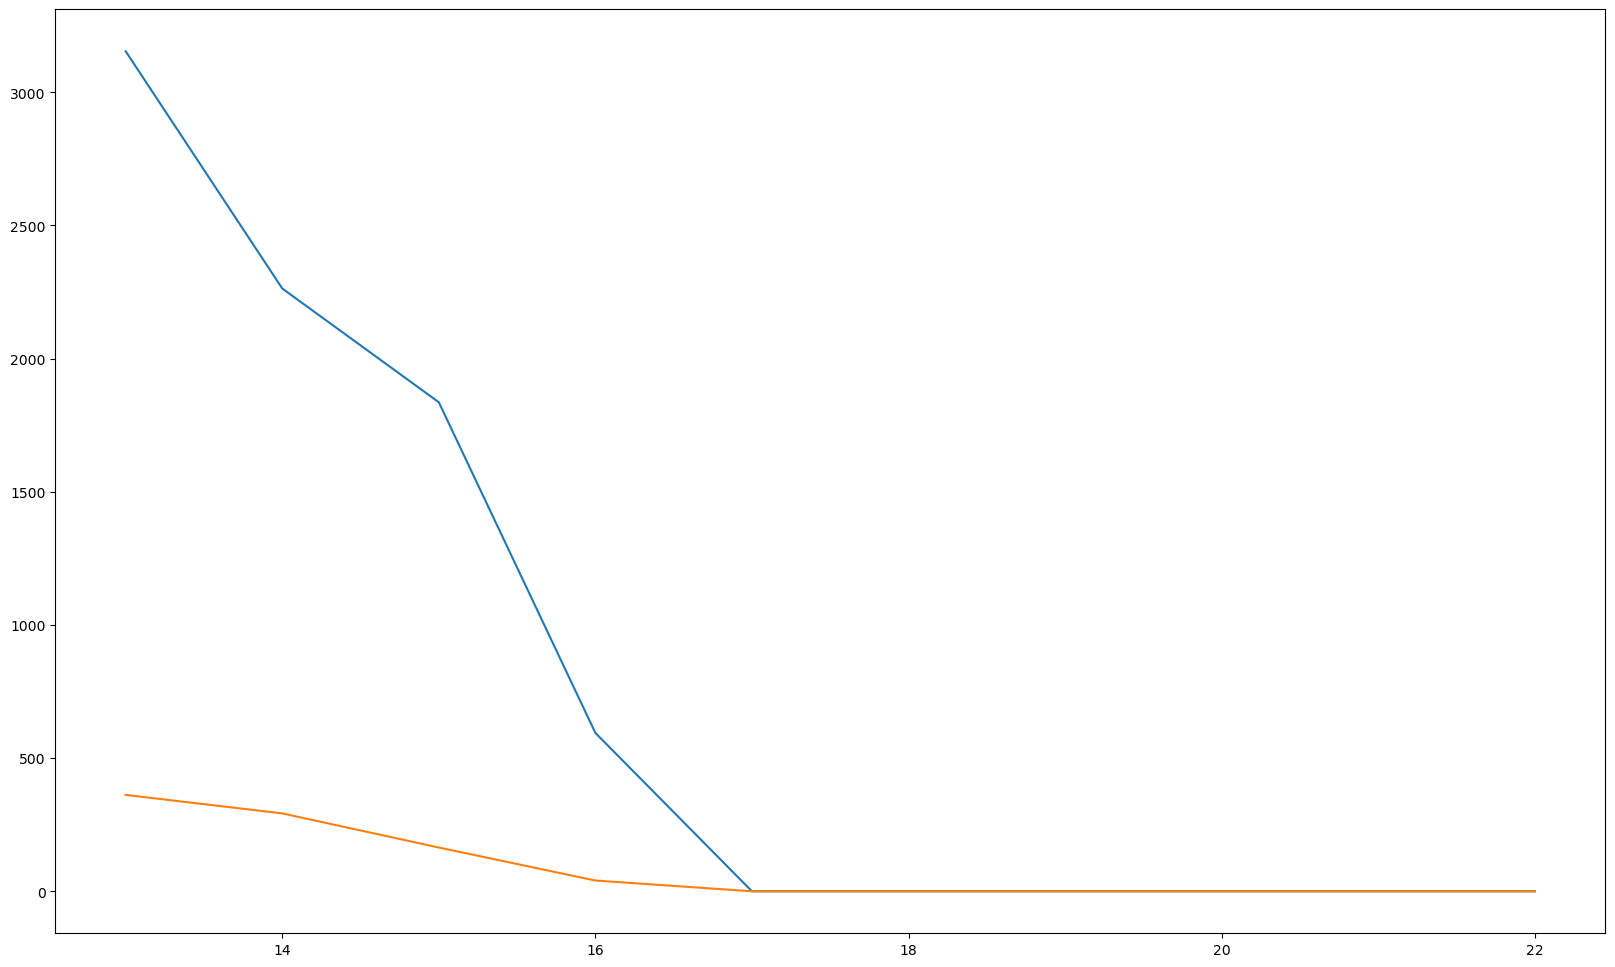

In [203]:
#plot 2
temp= merged_data.head(10)
plt.figure(figsize=(20, 12))
plt.plot(temp['HR'], temp['Avg Power'],label='Power')
plt.plot(temp['HR'], temp['ALLSKY_SFC_SW_DWN'],label='Power')


In [211]:
DATASET= merged_data[:]

In [217]:
DATASET.head(50)

,YEAR,MO,DY,HR,Avg Power,ALLSKY_SFC_SW_DWN
0,2020,12,31,13,3154.000000,361.82
1,2020,12,31,14,2263.333333,292.41
2,2020,12,31,15,1836.250000,164.33
3,2020,12,31,16,594.666667,40.36
4,2020,12,31,17,0.000000,0.00
5,2020,12,31,18,0.000000,0.00
6,2020,12,31,19,0.000000,0.00
7,2020,12,31,20,0.000000,0.00
8,2020,12,31,21,0.000000,0.00
9,2020,12,31,22,0.000000,0.00


In [225]:
DATASET['Avg Power'] = DATASET['Avg Power'].round(2)


In [233]:
DATASET = DATASET.rename(columns={'ALLSKY_SFC_SW_DWN': 'Irradiance'})

In [235]:
DATASET.to_csv('/Users/roxoho/Downloads/Data-pv/csv-data/DATASET.csv', index=False)

In [237]:
# loading Power dataset, irradance dataset(NASA)
# First changing the time to different values
# Averaging the power values
# Making data into the correct format and removing unnecessary values(very minimal) before merging
# Merging the irradiance values to Average Power values


## Next steps

In [31]:
data = pd.read_csv('/Users/roxoho/Downloads/Data-pv/csv-data/DATASET.csv')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10232 entries, 0 to 10231
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        10232 non-null  int64  
 1   MO          10232 non-null  int64  
 2   DY          10232 non-null  int64  
 3   HR          10232 non-null  int64  
 4   Avg Power   10232 non-null  float64
 5   Irradiance  10232 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 479.8 KB


In [35]:
data['Avg Power'] = data['Avg Power'] * 4

In [37]:
data.head(50)

,YEAR,MO,DY,HR,Avg Power,Irradiance
0,2020,12,31,13,12616.00,361.82
1,2020,12,31,14,9053.32,292.41
2,2020,12,31,15,7345.00,164.33
3,2020,12,31,16,2378.68,40.36
4,2020,12,31,17,0.00,0.00
5,2020,12,31,18,0.00,0.00
6,2020,12,31,19,0.00,0.00
7,2020,12,31,20,0.00,0.00
8,2020,12,31,21,0.00,0.00
9,2020,12,31,22,0.00,0.00


In [43]:
# Create a mask for hours 7 to 16
mask = (data['HR'] >= 7) & (data['HR'] <= 16)

# Fill 0 values with NaN in the specified range
data.loc[mask & (data['Avg Power'] == 0), 'Avg Power'] = np.nan

# Interpolate the NaN values
data['Avg Power'] = data['Avg Power'].interpolate(method='linear')

In [45]:
data.head(50)

,YEAR,MO,DY,HR,Avg Power,Irradiance
0,2020,12,31,13,12616.00,361.82
1,2020,12,31,14,9053.32,292.41
2,2020,12,31,15,7345.00,164.33
3,2020,12,31,16,2378.68,40.36
4,2020,12,31,17,0.00,0.00
5,2020,12,31,18,0.00,0.00
6,2020,12,31,19,0.00,0.00
7,2020,12,31,20,0.00,0.00
8,2020,12,31,21,0.00,0.00
9,2020,12,31,22,0.00,0.00


In [51]:
# ADDING FEATURES

features = pd.read_csv('/Users/roxoho/Downloads/Data-pv/csv-data/Features.csv', header=18)

In [53]:
features.head(20)

,YEAR,MO,DY,HR,T2M,QV2M,WD10M,WS10M,WS50M,WD50M,RH2M,PRECTOTCORR,T2MDEW,PS
0,2020,12,31,0,5.59,2.99,327.81,3.31,6.53,327.70,52.50,0.0,-3.27,99.13
1,2020,12,31,1,5.05,3.05,325.60,3.30,6.65,325.53,55.31,0.0,-3.09,99.12
2,2020,12,31,2,4.51,3.11,325.30,3.31,6.80,325.20,58.75,0.0,-2.81,99.10
3,2020,12,31,3,4.12,3.17,323.21,3.37,7.12,323.21,62.12,0.0,-2.44,99.08
4,2020,12,31,4,3.76,3.30,320.08,3.37,7.19,320.03,65.56,0.0,-2.06,99.09
5,2020,12,31,5,3.23,3.36,316.93,3.27,6.87,317.07,69.31,0.0,-1.81,99.10
6,2020,12,31,6,2.77,3.42,312.54,3.21,6.74,312.75,72.25,0.0,-1.68,99.16
7,2020,12,31,7,4.97,3.42,307.52,3.73,6.21,308.00,62.19,0.0,-1.63,99.23
8,2020,12,31,8,7.94,3.42,302.10,3.84,4.25,302.61,50.69,0.0,-1.61,99.30
9,2020,12,31,9,11.83,3.36,295.71,3.03,3.42,301.19,38.69,0.0,-1.75,99.33


In [ ]:
# only adding temperature, precipitation, wind speed(at 10 meters), wind direction(at 10 meters), specific humidity

In [59]:
columns = ['YEAR','MO','DY', 'HR', 'T2M', 'PRECTOTCORR', 'WS10M', 'WD10M', 'QV2M']
additional_features = features[columns].copy()

In [67]:
additional_features = additional_features.rename(columns={
    'T2M': 'Temperature',
    'PRECTOTCORR': 'Precipitation',
    'WS10M': 'Wind Speed',
    'WD10M': 'Wind Direction',
    'QV2M': 'Specific Humidity'
})
additional_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12192 entries, 0 to 12191
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               12192 non-null  int64  
 1   MO                 12192 non-null  int64  
 2   DY                 12192 non-null  int64  
 3   HR                 12192 non-null  int64  
 4   Temperature        12192 non-null  float64
 5   Precipitation      12192 non-null  float64
 6   Wind Speed         12192 non-null  float64
 7   Wind Direction     12192 non-null  float64
 8   Specific Humidity  12192 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 857.4 KB


In [81]:
additional_features.head(20)

,YEAR,MO,DY,HR,Temperature,Precipitation,Wind Speed,Wind Direction,Specific Humidity
0,2020,12,31,0,5.59,0.0,3.31,327.81,2.99
1,2020,12,31,1,5.05,0.0,3.30,325.60,3.05
2,2020,12,31,2,4.51,0.0,3.31,325.30,3.11
3,2020,12,31,3,4.12,0.0,3.37,323.21,3.17
4,2020,12,31,4,3.76,0.0,3.37,320.08,3.30
5,2020,12,31,5,3.23,0.0,3.27,316.93,3.36
6,2020,12,31,6,2.77,0.0,3.21,312.54,3.42
7,2020,12,31,7,4.97,0.0,3.73,307.52,3.42
8,2020,12,31,8,7.94,0.0,3.84,302.10,3.42
9,2020,12,31,9,11.83,0.0,3.03,295.71,3.36


In [75]:
merged_data = data.merge(additional_features, on=['YEAR', 'MO', 'DY', 'HR'], how='left')

In [79]:
merged_data.head(50)

,YEAR,MO,DY,HR,Avg Power,Irradiance,Temperature,Precipitation,Wind Speed,Wind Direction,Specific Humidity
0,2020,12,31,13,12616.00,361.82,20.77,0.00,2.45,325.65,2.26
1,2020,12,31,14,9053.32,292.41,20.51,0.00,2.43,324.93,2.20
2,2020,12,31,15,7345.00,164.33,19.26,0.00,2.13,326.84,2.20
3,2020,12,31,16,2378.68,40.36,14.96,0.00,2.12,325.08,2.38
4,2020,12,31,17,0.00,0.00,12.08,0.00,2.57,323.79,2.32
5,2020,12,31,18,0.00,0.00,10.73,0.00,2.71,323.92,2.38
6,2020,12,31,19,0.00,0.00,9.67,0.00,2.70,322.87,2.44
7,2020,12,31,20,0.00,0.00,9.14,0.00,2.60,321.58,2.50
8,2020,12,31,21,0.00,0.00,8.93,0.00,2.47,318.20,2.56
9,2020,12,31,22,0.00,0.00,8.76,0.00,2.40,313.81,2.56


In [83]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10232 entries, 0 to 10231
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               10232 non-null  int64  
 1   MO                 10232 non-null  int64  
 2   DY                 10232 non-null  int64  
 3   HR                 10232 non-null  int64  
 4   Avg Power          10232 non-null  float64
 5   Irradiance         10232 non-null  float64
 6   Temperature        10232 non-null  float64
 7   Precipitation      10232 non-null  float64
 8   Wind Speed         10232 non-null  float64
 9   Wind Direction     10232 non-null  float64
 10  Specific Humidity  10232 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 879.4 KB


In [93]:
DATASET_V1 = merged_data.copy()
DATASET_V1 = DATASET_V1.rename(columns={
    'Irradiance': 'Irradiance(Ideal)'})

In [95]:
DATASET_V1.head(50)

,YEAR,MO,DY,HR,Avg Power,Irradiance(Ideal),Temperature,Precipitation,Wind Speed,Wind Direction,Specific Humidity
0,2020,12,31,13,12616.00,361.82,20.77,0.00,2.45,325.65,2.26
1,2020,12,31,14,9053.32,292.41,20.51,0.00,2.43,324.93,2.20
2,2020,12,31,15,7345.00,164.33,19.26,0.00,2.13,326.84,2.20
3,2020,12,31,16,2378.68,40.36,14.96,0.00,2.12,325.08,2.38
4,2020,12,31,17,0.00,0.00,12.08,0.00,2.57,323.79,2.32
5,2020,12,31,18,0.00,0.00,10.73,0.00,2.71,323.92,2.38
6,2020,12,31,19,0.00,0.00,9.67,0.00,2.70,322.87,2.44
7,2020,12,31,20,0.00,0.00,9.14,0.00,2.60,321.58,2.50
8,2020,12,31,21,0.00,0.00,8.93,0.00,2.47,318.20,2.56
9,2020,12,31,22,0.00,0.00,8.76,0.00,2.40,313.81,2.56


In [99]:
DATASET_V1.to_csv('/Users/roxoho/Downloads/Data-pv/csv-data/DATASET_V1.csv', index=False)

In [101]:


# TRAINING



In [109]:
feature_columns = ['YEAR','MO','DY', 'HR', 'Temperature', 'Precipitation', 'Wind Speed', 'Wind Direction', 'Specific Humidity']
target_column = 'Avg Power'

In [166]:
X = DATASET_V1[feature_columns]
y = DATASET_V1[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [194]:


model = LinearRegression()
model.fit(X_train_scaled, y_train)



LinearRegression()

In [196]:
y_pred = model.predict(X_test_scaled)

In [198]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 43952976.8571753
Mean Absolute Error: 5088.639273127384
Root Mean Squared Error: 6629.704130440158


In [182]:
## For random forrest we have to make the prediction column to be of class label type

In [246]:
comparison_dfs = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_dfs['Index'] = range(1, len(y_test) + 1)
comparison_dfs.head(50)

,Actual,Predicted,Index
6930,0.00,-2829.904490,1
518,0.00,-911.715111,2
8813,0.00,5356.947220,3
8701,6384.68,5471.685249,4
6978,0.00,-793.879893,5
7458,3053.00,2411.093131,6
8141,0.00,2845.961474,7
2748,14134.00,10310.531274,8
2816,22155.00,10896.173457,9
3614,1844.00,4484.459386,10


In [266]:
# TEMPORARY PLOT( as we have to post process the results as well)

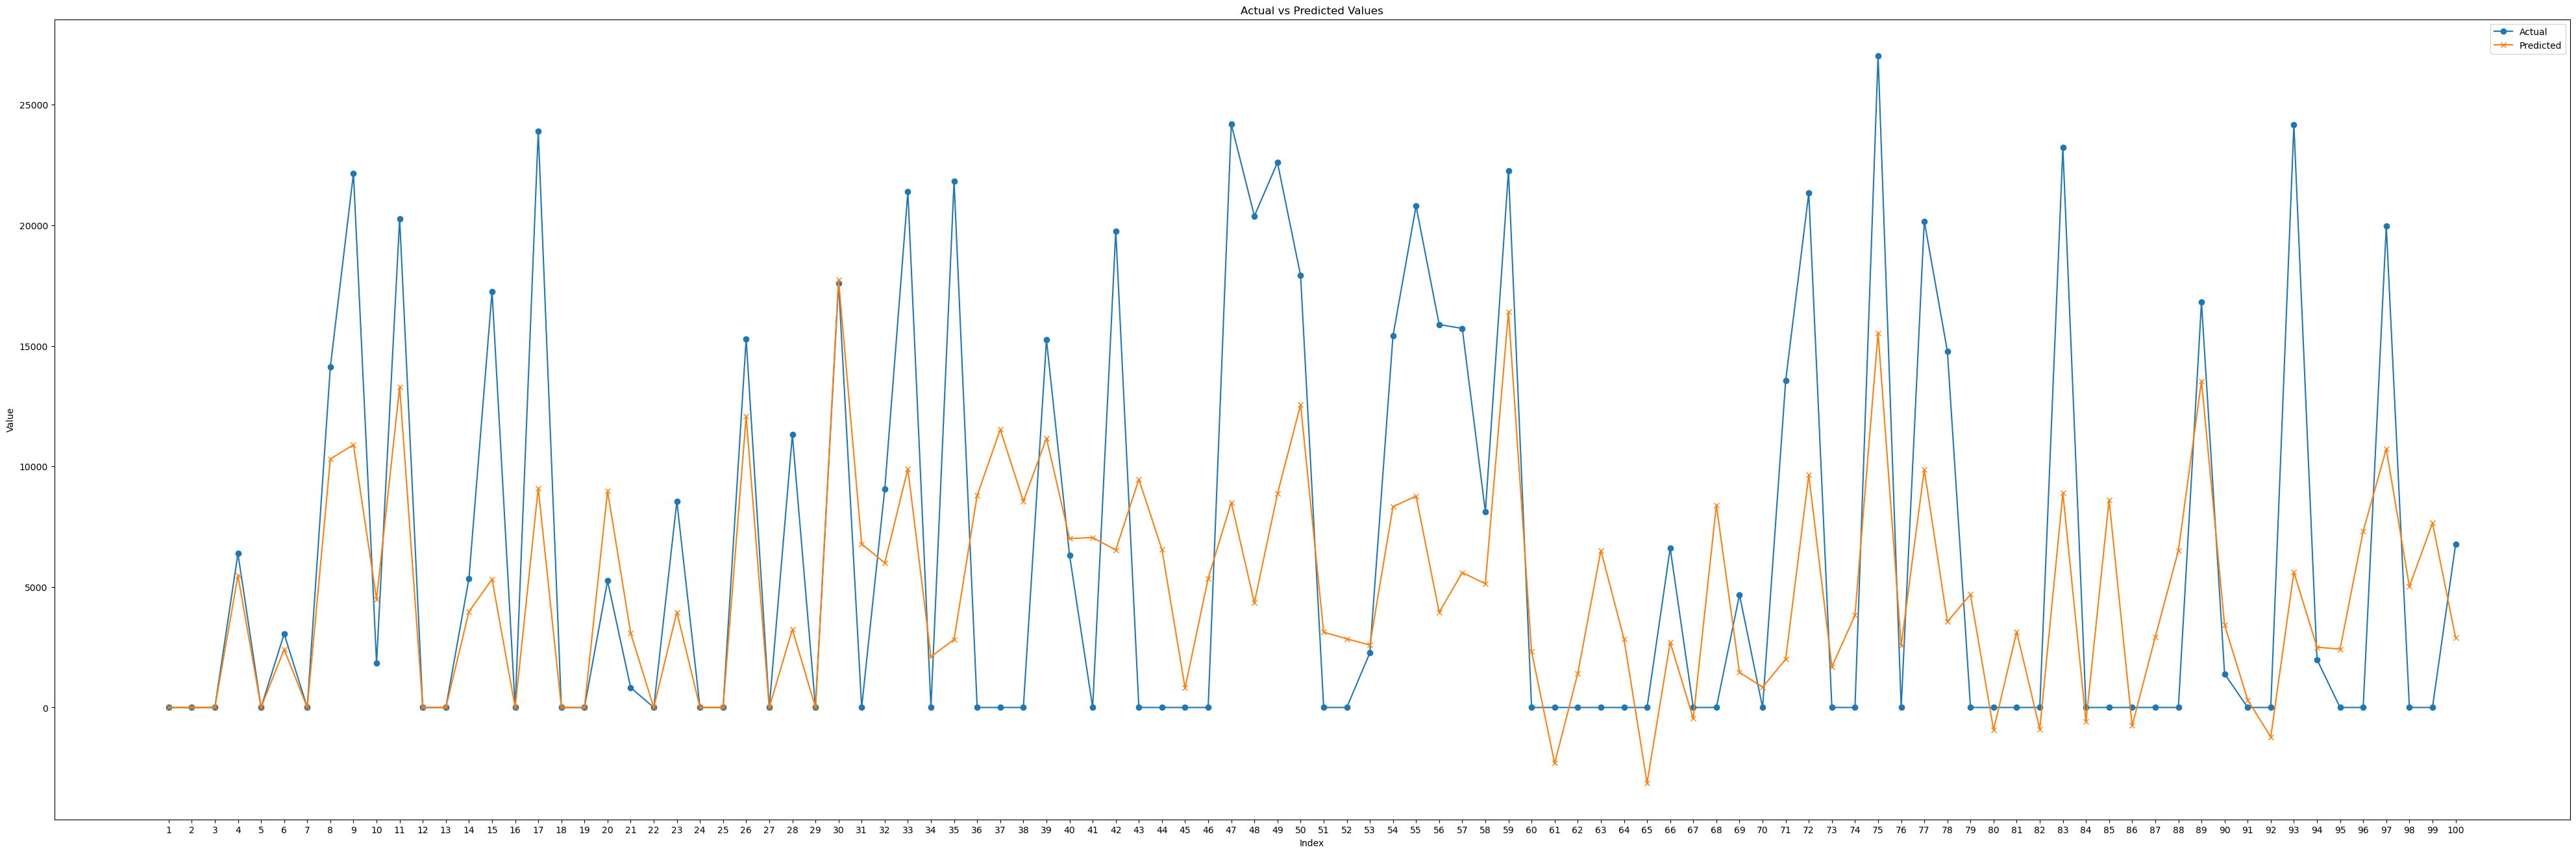

In [276]:
comparison_df=comparison_dfs.head(100)
plt.figure(figsize=(50, 16))
plt.plot(comparison_df['Index'], comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Index'], comparison_df['Predicted'], label='Predicted', marker='x')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.xticks(comparison_df['Index'])
plt.show()

In [284]:
# Example fo what i meant( for post processing)

comparison_df.loc[comparison_df['Actual'] == 0.0, 'Predicted'] = 0.0



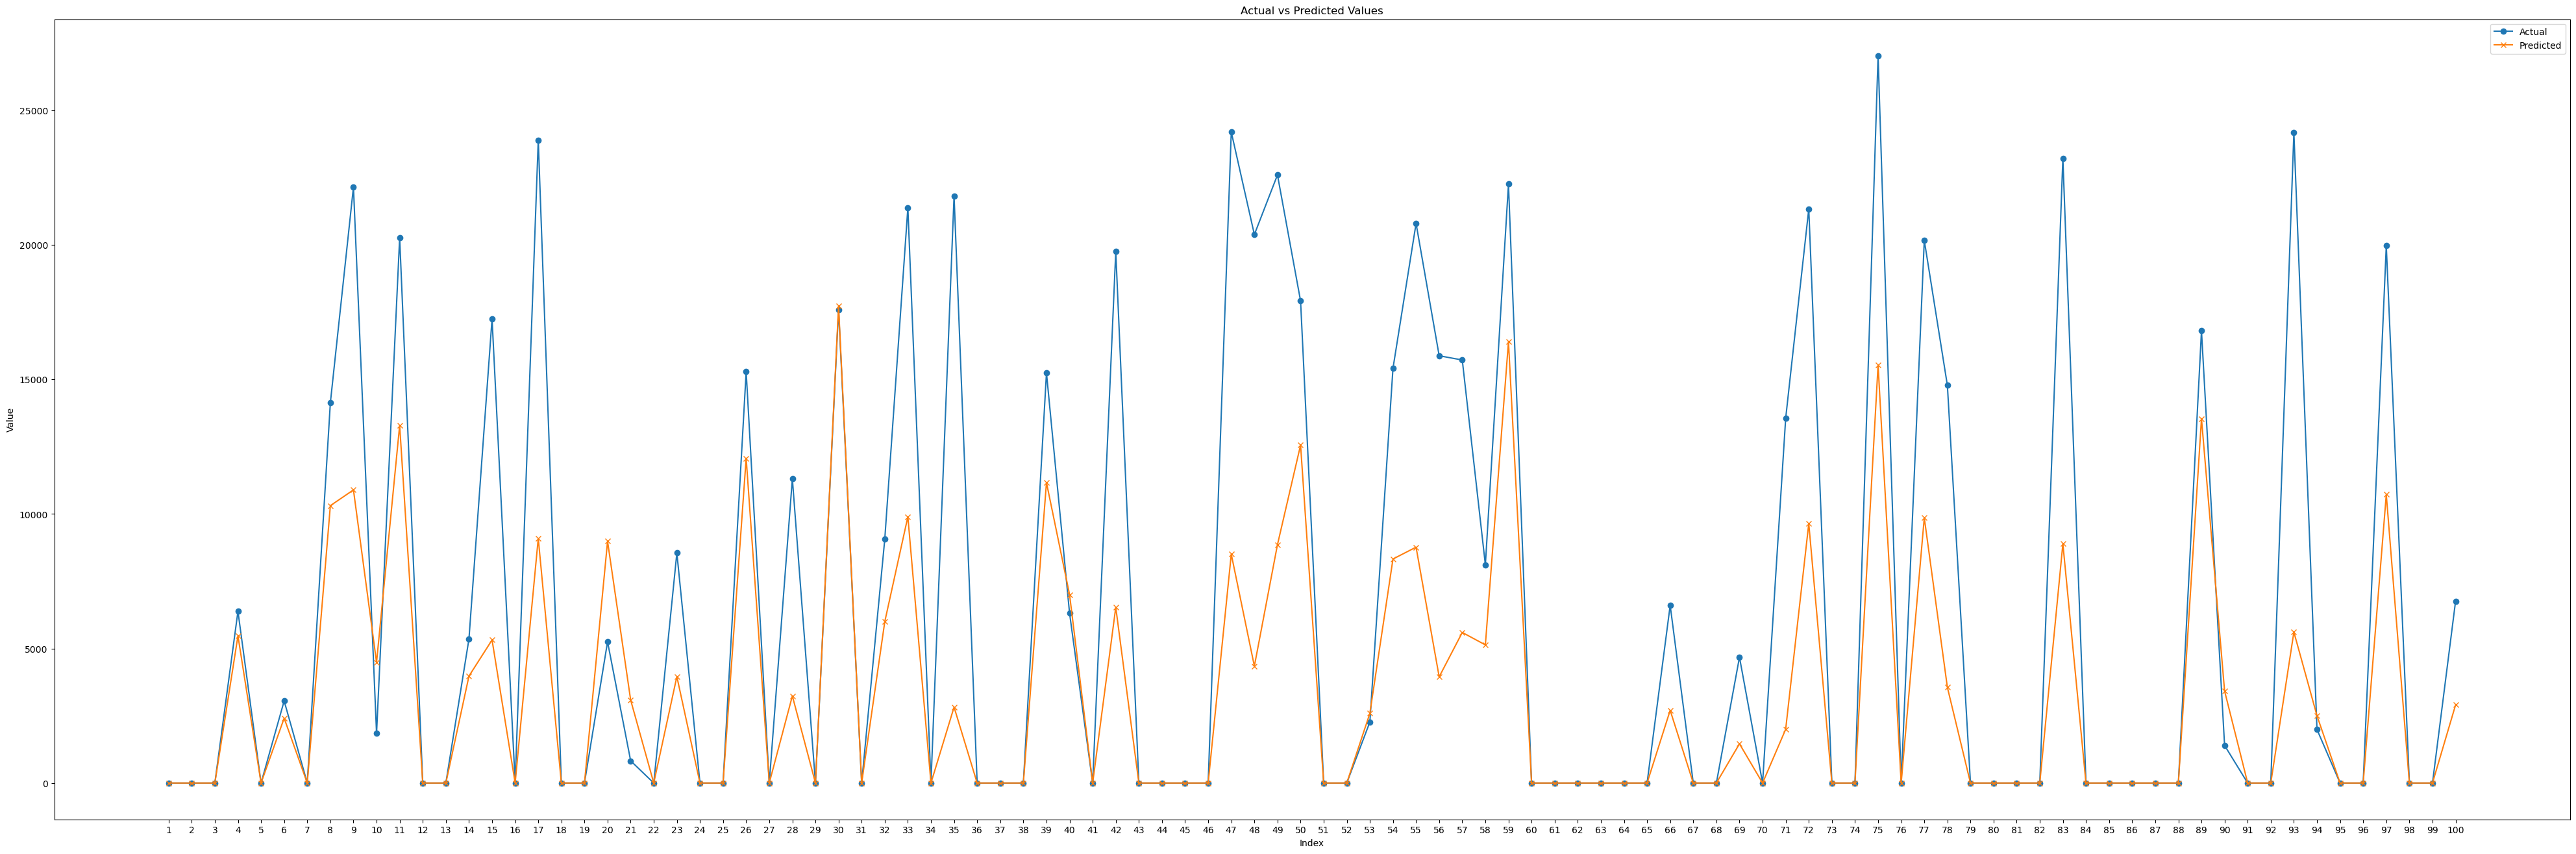

In [286]:
plt.figure(figsize=(50, 16))
plt.plot(comparison_df['Index'], comparison_df['Actual'], label='Actual', marker='o')
plt.plot(comparison_df['Index'], comparison_df['Predicted'], label='Predicted', marker='x')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.xticks(comparison_df['Index'])
plt.show()

In [228]:
## for the information on whether mantainence is required or not, we have to find the relation between Irradiance(ideal) and POWER(IDEAL)
## We have to find the POWER(IDEAL) data first, or manipulate other data to calculate this
## then we can use the PREDICTED POWER to calculate the DIFFERENCE

In [206]:
## Next steps, making it suitable for other models, trying different combinations of features and using different models

In [268]:
#feature_columns are ['YEAR','MO','DY', 'HR', 'Temperature', 'Precipitation', 'Wind Speed', 'Wind Direction', 'Specific Humidity']
#target_column is 'Avg Power'


#model = LinearRegression()

#Interpolation is used to fill missing Power values
